In [1]:
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('data_Morgan_1.csv')
df.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,Activity
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
df2 = pd.read_csv('rdkit_descriptors_208_with_activity.csv')
df2.drop('Activity', axis = 1, inplace = True)
df2.head()

,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,qed,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,14.607685,-1.275102,14.607685,0.137208,0.893230,331.347,313.203,331.133220,126,0,...,0,0,0,0,0,0,0,0,0,0
1,10.427986,-0.635752,10.427986,0.196415,0.384874,325.737,317.673,325.003638,108,0,...,0,0,0,0,0,0,0,0,0,0
2,10.505713,-0.632032,10.505713,0.204419,0.353751,350.356,336.244,350.068491,126,0,...,0,0,0,0,0,0,0,0,0,0
3,10.420390,-0.618689,10.420390,0.256214,0.388807,290.304,280.224,290.047361,102,0,...,0,0,0,0,0,0,0,0,0,0
4,10.461498,-0.631261,10.461498,0.201693,0.319099,449.084,442.028,446.863634,114,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
df = pd.concat([df, df2], axis = 1)
df.head()

,0,1,2,3,4,5,6,7,8,9,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
df.shape

(23791, 2257)

In [6]:
df.dropna(inplace=True)

In [7]:
df.shape

(23684, 2257)

In [8]:
# Get columns with null values
null_columns = df.columns[df.isnull().any()].tolist()

# Print the columns with null values
print("Columns with null values:", null_columns)

for i in null_columns:
    print(df[i].isnull().mean()*100)

Columns with null values: []


In [9]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler



# Display the shape and summary of the DataFrame before dropping missing values
print(f'Shape before dropping NaN values: {df.shape}')
print(df.describe())

# Drop rows with missing values
df.dropna(inplace=True)
print(f'Shape after dropping NaN values: {df.shape}')

# Prepare features and target variable
X = df.drop(['Activity'], axis=1)
y = df['Activity']
print(f'Shape of X: {X.shape}')
print(f'Shape of y: {y.shape}')

# Scale the features to be between 0 and 1
scaler = MinMaxScaler()
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# Print the statistics of X after scaling
print("Statistics of X after Min-Max scaling (0 to 1):")
print(X_scaled.describe())

# Include target variable and update df
df = X_scaled.copy()
df['Activity'] = y.reset_index(drop=True)

# Display the updated DataFrame
print("Updated DataFrame with scaled features and activity:")
print(df.head())


Shape before dropping NaN values: (23684, 2257)
                  0             1             2             3             4  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.005784      0.164795      0.048978      0.009458      0.010556   
std        0.075837      0.371003      0.215827      0.096793      0.102199   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

                  5             6             7             8             9  \
count  23684.000000  23684.000000  23684.000000  23684.000000  23684.000000   
mean       0.028880      0.008613      0.006713      0.021660      0.011949   
std

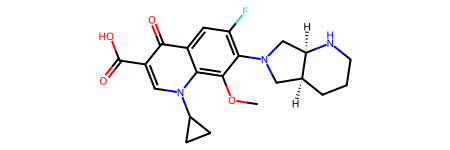

In [15]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
m = Chem.MolFromSmiles('COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O')
m

In [17]:
bit={}
morganfp=AllChem.GetMorganFingerprintAsBitVect(m,useChirality=True, radius=5, nBits = 2048, bitInfo=bit)

[17:12:43] DEPRECATION WARNING: please use MorganGenerator


In [19]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import AllChem, Draw

# Convert SMILES to RDKit molecule
smiles = 'COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O'
m = Chem.MolFromSmiles(smiles)

# Initialize a dictionary for bit information
bit_info = {}

# Generate the Morgan fingerprint with specified parameters
radius = 5
nBits = 2048
morganfp = AllChem.GetMorganFingerprintAsBitVect(m, useChirality=True, radius=radius, nBits=nBits, bitInfo=bit_info)

# Convert the fingerprint to a NumPy array
mfpvector = np.zeros((morganfp.GetNumBits(),), dtype=int)
for i in range(morganfp.GetNumBits()):
    mfpvector[i] = morganfp.GetBit(i)

# Print non-zero indices (bits set to 1)
print("Non-zero bit indices:", np.nonzero(mfpvector)[0])



Non-zero bit indices: [  13   41   43   73   89  100  102  128  146  147  305  314  326  333
  338  347  389  407  422  453  456  464  493  497  525  577  590  624
  650  655  669  695  699  739  742  801  807  841  844  873  875  896
  907  926  935  983 1004 1019 1020 1028 1047 1055 1057 1079 1083 1114
 1199 1220 1229 1235 1318 1325 1332 1341 1357 1376 1380 1385 1396 1402
 1425 1440 1450 1472 1507 1536 1559 1599 1610 1682 1729 1735 1840 1849
 1873 1876 1882 1908 1910 1912 1917 1928 1987 1989 1991 2005 2017 2029]


[17:13:03] DEPRECATION WARNING: please use MorganGenerator


In [20]:
# Required libraries: rdkit, xgboost, scikit-learn, pandas
from rdkit import Chem
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem import Descriptors
from rdkit.Chem.AllChem import GetMorganFingerprintAsBitVect
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Step 1: Generate molecular descriptors for Moxifloxacin
moxifloxacin_smiles = "COC1=C2C(=CC(=C1N3C[C@@H]4CCCN[C@@H]4C3)F)C(=O)C(=CN2C5CC5)C(=O)O"
moxifloxacin_molecule = Chem.MolFromSmiles(moxifloxacin_smiles)

# List of molecular descriptors from RDKit
descriptor_names = [desc[0] for desc in Descriptors.descList]

# Compute descriptors for the Moxifloxacin molecule
calculator = MoleculeDescriptors.MolecularDescriptorCalculator(descriptor_names)
moxifloxacin_descriptors = calculator.CalcDescriptors(moxifloxacin_molecule)

# Step 2: Generate the Morgan fingerprint (2048 bits) for Moxifloxacin
morgan_fingerprint = GetMorganFingerprintAsBitVect(moxifloxacin_molecule, radius=2, nBits=2048)
moxifloxacin_fp_array = list(morgan_fingerprint)

# Combine molecular descriptors and Morgan fingerprint into one feature vector
combined_features = list(moxifloxacin_descriptors) + moxifloxacin_fp_array

# Create a DataFrame with descriptor names and Morgan fingerprint bits
morgan_bit_names = [str(i) for i in range(2048)]  # Simple numeric format for Morgan bits
combined_feature_names = descriptor_names + morgan_bit_names

# Create a DataFrame for Moxifloxacin
moxifloxacin_df = pd.DataFrame([combined_features], columns=combined_feature_names)

# Step 3: Load your dataset
# Assuming `df` is your dataset with molecular descriptors and target labels (Activity)
# df = pd.read_csv('your_dataset.csv')  # Uncomment this line to load your dataset

# For demonstration, assume `df` is defined with relevant features and 'Activity' as the target
X = df.drop('Activity', axis=1)
y = df['Activity']

# Step 4: Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 5: Define the best parameters for the XGBoost model
best_params = {
    'max_depth': 12,
    'n_estimators': 207,
    'scale_pos_weight': 2.2233911067827616,
    'random_state': 42
}

# Step 6: Initialize and train the XGBoost model
model = xgb.XGBClassifier(**best_params)
model.fit(X_train, y_train)

# Step 7: Feature importance analysis from the XGBoost model
importance = model.feature_importances_  # Get feature importances

# Convert to a DataFrame for better visualization and manipulation
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importance
})

# Sort by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Updated non-zero bit indices for Moxifloxacin
non_zero_bit_indices = [
    13, 41, 43, 73, 89, 100, 102, 128, 146, 147, 305, 314, 326, 333, 338, 347, 389, 407, 422, 453, 456, 464, 493, 497, 525, 577, 590, 624, 650, 655, 669, 695, 699, 739, 742, 801, 807, 841, 844, 873, 875, 896, 907, 926, 935, 983, 1004, 1019, 1020, 1028, 1047, 1055, 1057, 1079, 1083, 1114, 1199, 1220, 1229, 1235, 1318, 1325, 1332, 1341, 1357, 1376, 1380, 1385, 1396, 1402, 1425, 1440, 1450, 1472, 1507, 1536, 1559, 1599, 1610, 1682, 1729, 1735, 1840, 1849, 1873, 1876, 1882, 1908, 1910, 1912, 1917, 1928, 1987, 1989, 1991, 2005, 2017, 2029

]

# Step 8: Filter for only the important features
important_feature_names = importance_df['Feature'].head(500).values  # Get the top important feature names

# Create a list to store features that match with the non-zero bit indices
matching_features = [name for idx, name in enumerate(X.columns) if idx in non_zero_bit_indices and name in important_feature_names]

# Filter importance_df for matching features only
matching_importance_df = importance_df[importance_df['Feature'].isin(matching_features)]
print("\nFeature Importances of Matching Features:")
print(matching_importance_df)

# Create a new DataFrame for Moxifloxacin with only the important matching features
moxifloxacin_important_features = moxifloxacin_df[matching_features]

print("\nFiltered Moxifloxacin DataFrame with Important Features:")
print(moxifloxacin_important_features)


[17:14:40] DEPRECATION WARNING: please use MorganGenerator
[17:14:40] DEPRECATION WARNING: please use MorganGenerator
[17:14:40] DEPRECATION WARNING: please use MorganGenerator
[17:14:41] DEPRECATION WARNING: please use MorganGenerator



Feature Importances of Matching Features:
     Feature  Importance
1928    1928    0.006140
497      497    0.005664
43        43    0.004239
326      326    0.003480
1019    1019    0.003380
650      650    0.003146
1610    1610    0.003082
1599    1599    0.002634
624      624    0.002547
1402    1402    0.002166
1235    1235    0.002048
1047    1047    0.001937
146      146    0.001860
1876    1876    0.001568
1357    1357    0.001545
1536    1536    0.001512
1682    1682    0.001417
422      422    0.001273
1912    1912    0.001188
389      389    0.001169
89        89    0.000964
1114    1114    0.000960
1840    1840    0.000923
699      699    0.000858
456      456    0.000855
896      896    0.000716
41        41    0.000704
2029    2029    0.000659
1004    1004    0.000623
102      102    0.000578
1440    1440    0.000575
1917    1917    0.000567
1991    1991    0.000560
1385    1385    0.000555
983      983    0.000523
935      935    0.000518
1229    1229    0.000506

Filter

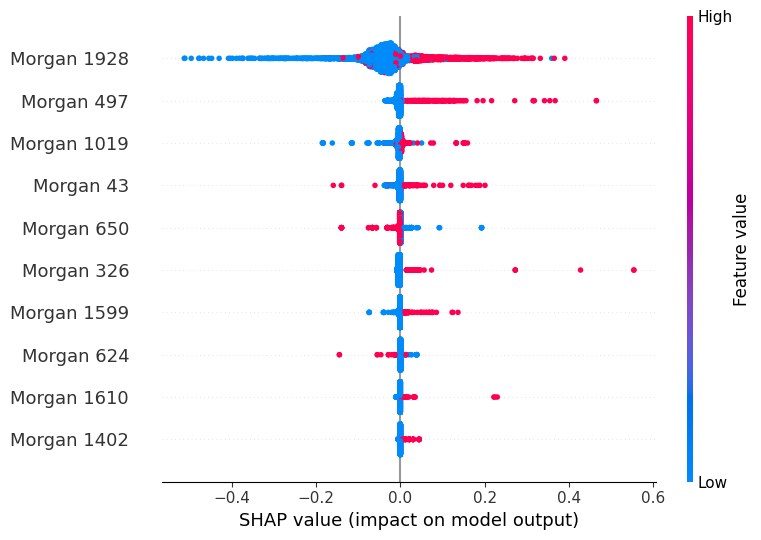

<Figure size 640x480 with 0 Axes>

Top 10 Important Features:
   Feature  Importance
0     1928    0.006140
1      497    0.005664
2       43    0.004239
3      326    0.003480
4     1019    0.003380
5      650    0.003146
6     1610    0.003082
7     1599    0.002634
8      624    0.002547
9     1402    0.002166


In [22]:
import matplotlib.pyplot as plt
import shap
import pandas as pd

# Assuming 'model' is your trained XGBoost model
# Assuming 'X_test' is your test dataset

# Step 1: Initialize the SHAP explainer
explainer = shap.TreeExplainer(model)

# Step 2: Calculate SHAP values for the entire test dataset
shap_values = explainer.shap_values(X_test)

# Step 3: Convert SHAP values to a DataFrame
shap_df = pd.DataFrame(shap_values, columns=X_test.columns)

# Step 4: Create a DataFrame for important features and their importance values
importance_values = {
    'Feature': [
        1928, 497, 43, 326, 1019, 650, 1610, 1599, 624, 1402, 1235, 1047, 146, 1876, 
        1357, 1536, 1682, 422, 1912, 389, 89, 1114, 1840, 699, 456, 896, 41, 2029, 
        1004, 102, 1440, 1917, 1991, 1385, 983, 935, 1229
    ],
    'Importance': [
        0.006140, 0.005664, 0.004239, 0.003480, 0.003380, 0.003146, 0.003082, 
        0.002634, 0.002547, 0.002166, 0.002048, 0.001937, 0.001860, 0.001568, 
        0.001545, 0.001512, 0.001417, 0.001273, 0.001188, 0.001169, 0.000964, 
        0.000960, 0.000923, 0.000858, 0.000855, 0.000716, 0.000704, 0.000659, 
        0.000623, 0.000578, 0.000575, 0.000567, 0.000560, 0.000555, 0.000523, 
        0.000518, 0.000506
    ]
}


# Convert to DataFrame
importance_df = pd.DataFrame(importance_values)

# Step 5: Sort by importance and take the top 10 features
top_10_importance_df = importance_df.nlargest(10, 'Importance')

# Step 6: Extract the SHAP values for the top 10 important features
important_features_indices = top_10_importance_df['Feature'].values
important_features_shap_values = shap_values[:, important_features_indices]

# Step 7: Create custom feature names
important_features_names = [f"Morgan {index}" for index in important_features_indices]

# Step 8: Ensure we are selecting the correct columns from X_test
# Get the actual column names from the indices
important_feature_columns = X_test.columns[important_features_indices].tolist()

# Step 9: Plot SHAP summary for the top 10 important features
plt.figure(figsize=(10, 7))
shap.summary_plot(
    important_features_shap_values,
    X_test[important_feature_columns],
    plot_type="dot",
    feature_names=important_features_names
)

# Save the plot
plt.savefig('shap_values_top_10_important_features.png', dpi=300)
plt.show()

# Print the top 10 important features
print("Top 10 Important Features:")
print(top_10_importance_df)


In [ ]:
Draw.DrawMorganBit(m,1928, bit)

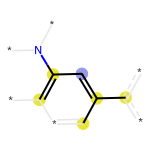

In [21]:
Draw.DrawMorganBit(m,497, bit)

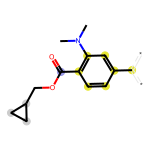

In [22]:
Draw.DrawMorganBit(m,43, bit)

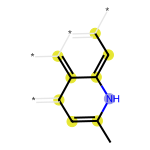

In [23]:
Draw.DrawMorganBit(m,326, bit)

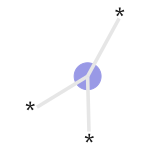

In [24]:
Draw.DrawMorganBit(m,1019, bit)

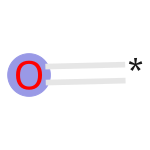

In [25]:
Draw.DrawMorganBit(m,650, bit)